# Plotting choropleth shapes

In [1]:
import geopandas as gpd
import matplotlib.pyplot as plt
import geomappy as mp
import numpy as np
import os
os.chdir("../../../")

Loading data on river plastic mobilisation when flood events happen (Roebroek et al., 2021).

In [3]:
df = gpd.read_file("data/countries/plastic_mobilisation.shp")
df.columns

The data shows like this when plotted within the geopandas dataframe.

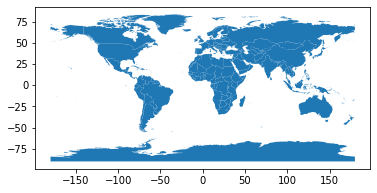

In [9]:
df.plot()
plt.show()

In its most simple form, the ``plot_shapes`` function does exactly the same (with some minor esthetic changes)

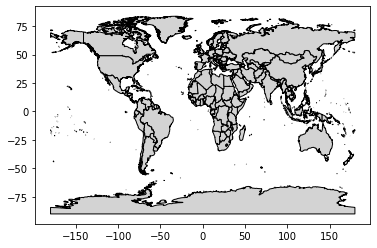

In [8]:
mp.plot_shapes(df=df)
plt.show()

Choropleth capabilities are available when selecting a column to express the values. In this case `e_10` expresses plastic mobilisation when relatively low-impact floods occur.

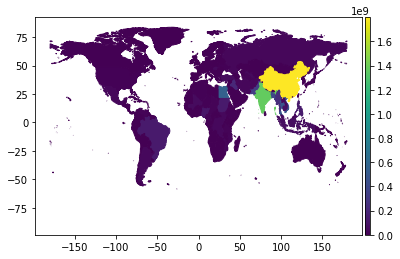

In [10]:
mp.plot_shapes(df=df, values='e_10')
plt.show()

Similarly to ``plot_raster`` it provides ``vmin``, ``vmax`` and ``bins`` to enhance visibility. (Note that ``pad_fraction`` and ``aspect`` are used to change how the colobar is represented)

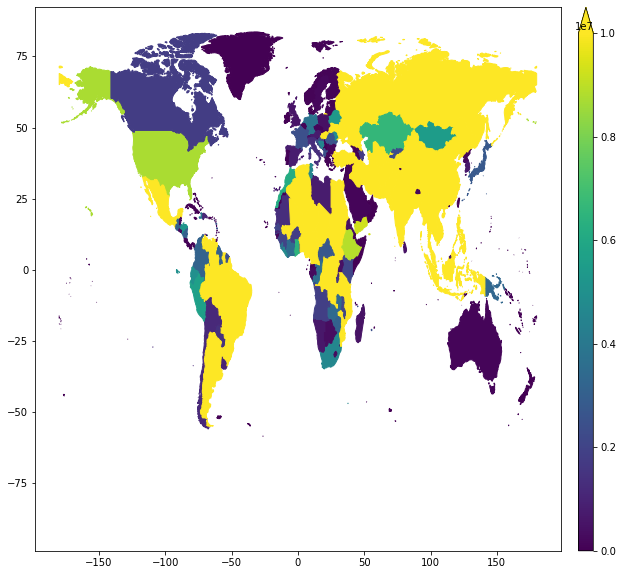

In [20]:
mp.plot_shapes(df=df, values='e_10', vmax=10000000, figsize=(10,10), pad_fraction=1.2, aspect=17)
plt.show()

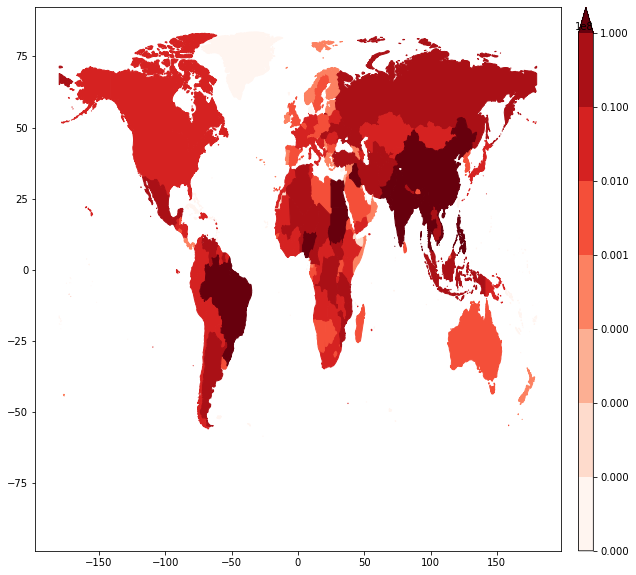

In [23]:
mp.plot_shapes(df=df, values='e_10', cmap="Reds", bins=[0,100,1000,10000,100000,1000000, 10000000, 100000000], figsize=(10,10), pad_fraction=1.2, aspect=17)
plt.show()

Again a basemap is easily provided

/home/caspar/Packages/geomappy/geomappy/basemap.py:162: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if extent == "global":


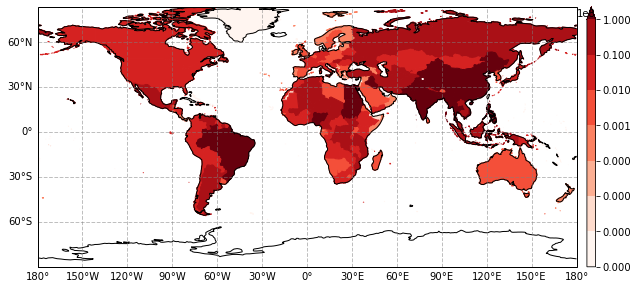

In [25]:
ax = mp.basemap(df.total_bounds)
mp.plot_shapes(df=df, values='e_10', ax=ax, cmap="Reds", bins=[0,100,1000,10000,100000,1000000, 10000000, 100000000], figsize=(10,10), pad_fraction=1.2)
plt.show()

The legend is hard to interpret this way. To solve this, the legend items can be overloaded with their E notation. In addition, a customised label can be placed next to the colorbar.

/home/caspar/Packages/geomappy/geomappy/basemap.py:162: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if extent == "global":


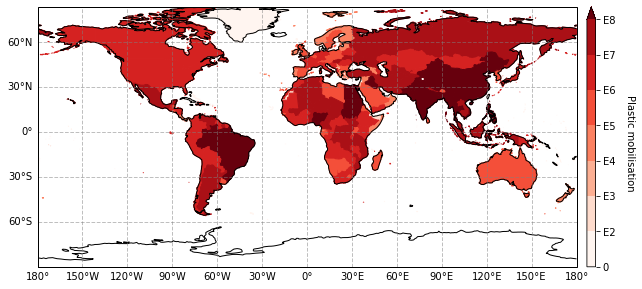

In [34]:
ax = mp.basemap(df.total_bounds)
mp.plot_shapes(df=df, values='e_10', ax=ax, cmap="Reds", bins=[0,100,1000,10000,100000,1000000, 10000000, 100000000], bin_labels = [0, "E2", "E3", "E4", "E5", "E6", "E7", "E8"], figsize=(10,10), pad_fraction=1.2, legend_kwargs=dict(label="Plastic mobilisation", label_font=dict(rotation=270, labelpad=20)))
plt.show()